<a href="https://colab.research.google.com/github/SLCFLAB/Data-Science-Python/blob/main/Day%209/9_2_categorical_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7.2 범주형 데이터 이진분류 경진대회 탐색적 데이터 분석

- [범주형 데이터 이진분류 경진대회 링크](https://www.kaggle.com/c/cat-in-the-dat/)  
- [탐색적 데이터 분석 코드 참고 링크](https://www.kaggle.com/kabure/eda-feat-engineering-encode-conquer)
- https://www.kaggle.com/code/werooring/ch7-eda


## 7.2.1 데이터 둘러보기

In [1]:
import pandas as pd

# 데이터 경로
data_path = 'https://raw.githubusercontent.com/SLCFLAB/Data-Science-Python/main/Day%209/data/'


train = pd.read_csv(data_path + 'cat_train.csv', index_col='id')
test = pd.read_csv(data_path + 'cat_test.csv', index_col='id')
submission = pd.read_csv(data_path + 'cat_sample_submission.csv', index_col='id')

In [2]:
train.shape, test.shape

((600000, 24), (400000, 23))

In [3]:
train.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,Bassoon,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,Theremin,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,Bassoon,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,Theremin,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,NaN,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


In [4]:
train.head().T

id,0,1,2,3,4
bin_0,0.0,1.0,0.0,NaN,0.0
bin_1,0.0,1.0,1.0,0.0,NaN
bin_2,0.0,0.0,0.0,0.0,0.0
bin_3,F,F,F,F,T
bin_4,N,Y,N,N,N
nom_0,Red,Red,Red,Red,Red
nom_1,Trapezoid,Star,NaN,Circle,Triangle
nom_2,Hamster,Axolotl,Hamster,Hamster,Hamster
nom_3,Russia,NaN,Canada,Finland,Costa Rica
nom_4,Bassoon,Theremin,Bassoon,Theremin,NaN


In [5]:
submission.head()

,target
id,
600000,0.5
600001,0.5
600002,0.5
600003,0.5
600004,0.5


### 피처 요약표 만들기

In [6]:
def resumetable(df):
    print(f'데이터 세트 형상: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': '피처'})
    summary['결측값 개수'] = df.isnull().sum().values
    summary['고윳값 개수'] = df.nunique().values
    summary['첫 번째 값'] = df.loc[0].values
    summary['두 번째 값'] = df.loc[1].values
    summary['세 번째 값'] = df.loc[2].values
    
    return summary

resumetable(train)

데이터 세트 형상: (600000, 24)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫 번째 값,두 번째 값,세 번째 값
0,bin_0,float64,17894,2,0.0,1.0,0.0
1,bin_1,float64,18003,2,0.0,1.0,1.0
2,bin_2,float64,17930,2,0.0,0.0,0.0
3,bin_3,object,18014,2,F,F,F
4,bin_4,object,18047,2,N,Y,N
5,nom_0,object,18252,3,Red,Red,Red
6,nom_1,object,18156,6,Trapezoid,Star,NaN
7,nom_2,object,18035,6,Hamster,Axolotl,Hamster
8,nom_3,object,18121,6,Russia,NaN,Canada
9,nom_4,object,18035,4,Bassoon,Theremin,Bassoon


### 피처 요약표 해석하기

In [7]:
for i in range(3):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_0 고윳값: [ 3.  1.  2. nan]
ord_1 고윳값: ['Contributor' 'Grandmaster' nan 'Novice' 'Expert' 'Master']
ord_2 고윳값: ['Hot' 'Warm' 'Freezing' 'Lava Hot' 'Cold' 'Boiling Hot' nan]


In [8]:
for i in range(3, 6):
    feature = 'ord_' + str(i)
    print(f'{feature} 고윳값: {train[feature].unique()}')

ord_3 고윳값: ['c' 'e' 'n' 'a' 'h' 'b' 'd' 'k' 'g' 'o' 'i' 'm' nan 'f' 'l' 'j']
ord_4 고윳값: ['U' 'X' 'P' 'C' 'Q' 'R' 'Y' 'N' 'I' 'O' 'M' 'E' 'V' 'K' 'G' 'B' 'H' nan
 'T' 'W' 'A' 'F' 'D' 'S' 'J' 'L' 'Z']
ord_5 고윳값: ['Pw' 'pE' 'eN' nan 'OZ' 'wa' 'rg' 'PS' 'mX' 'hG' 'xF' 'RV' 'Nh' 'dp' 'SS'
 'OM' 'Rv' 'HF' 'iS' 'HK' 'Ib' 'AW' 'mi' 'jf' 'Tz' 'ok' 'nS' 'Sz' 'sf'
 'Fl' 'fV' 'iv' 'US' 'dh' 'Io' 'RD' 'oI' 'DN' 'IS' 'oh' 'YJ' 'vq' 'us'
 'sY' 'th' 'Ey' 'AI' 'Mg' 'oU' 'Dj' 'TH' 'CN' 'aA' 'tT' 'Wr' 'TZ' 'mo'
 'rM' 'Pk' 'UV' 'RT' 'DT' 'Hk' 'Dn' 'nj' 'gL' 'cy' 'JT' 'XC' 'lA' 'TL'
 'zp' 'XM' 'AG' 'WW' 'GZ' 'MV' 'Bx' 'oJ' 'ze' 'Rj' 'LY' 'Iq' 'gc' 'LS'
 'hx' 'JQ' 'fO' 'vx' 'MX' 'ly' 'BX' 'Yr' 'XR' 'yE' 'Sk' 'aE' 'wU' 'rA'
 'Ji' 'qN' 'nn' 'kv' 'pB' 'sc' 'EC' 'kT' 'be' 'uQ' 'DI' 'hT' 'pl' 'tn'
 'xG' 'NT' 'fe' 'lS' 'Mq' 'Yi' 'BL' 'AU' 'ht' 'Ro' 'al' 'mD' 'ur' 'DR'
 'Re' 'XI' 'sF' 'Rz' 'Lo' 'In' 'Kq' 'cY' 'uZ' 'rl' 'zc' 'XU' 'CU' 'lR'
 'xB' 'pT' 'gj' 'Ox' 'yK' 'vw' 'Ay' 'HO' 'TP' 'ep' 'ne' 'Oe' 'mP' 'cR'
 'IA'

In [9]:
print('day 고윳값:', train['day'].unique())
print('month 고윳값:', train['month'].unique())
print('target 고윳값:', train['target'].unique())

day 고윳값: [ 6.  7.  5.  3.  1.  2. nan  4.]
month 고윳값: [ 3.  7.  9. 12.  4.  6.  1.  8.  5. 11. nan 10.  2.]
target 고윳값: [0 1]


## 7.2.2 데이터 시각화

In [10]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

### 타깃 값 분포

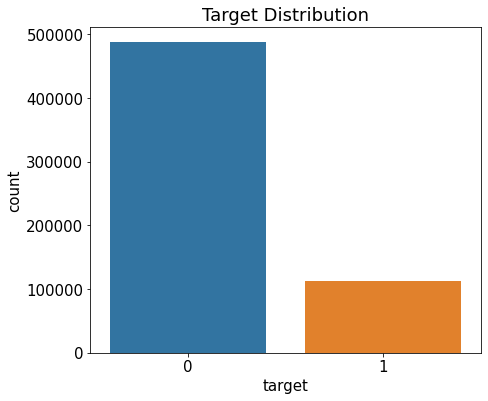

In [11]:
mpl.rc('font', size=15) # 폰트 크기 설정
plt.figure(figsize=(7, 6)) # Figure 크기 설정

# 타깃값 분포 카운트플롯
ax = sns.countplot(x='target', data=train)
ax.set(title='Target Distribution');

In [12]:
rectangle = ax.patches[0] # 첫 번째 Rectangle 객체
print('사각형 높이:', rectangle.get_height())
print('사각형 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())

사각형 높이: 487677
사각형 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [13]:
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width()/2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(train)*0.001)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 488277.0


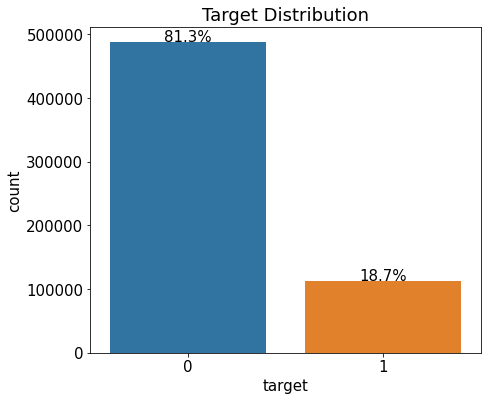

In [14]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타깃값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타깃값 비율
        
        # (x, y) 좌표에 텍스트 입력 
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

plt.figure(figsize=(7, 6))

ax = sns.countplot(x='target', data=train)
write_percent(ax, len(train)) # 비율 표시
ax.set_title('Target Distribution');

### 이진 피처 분포

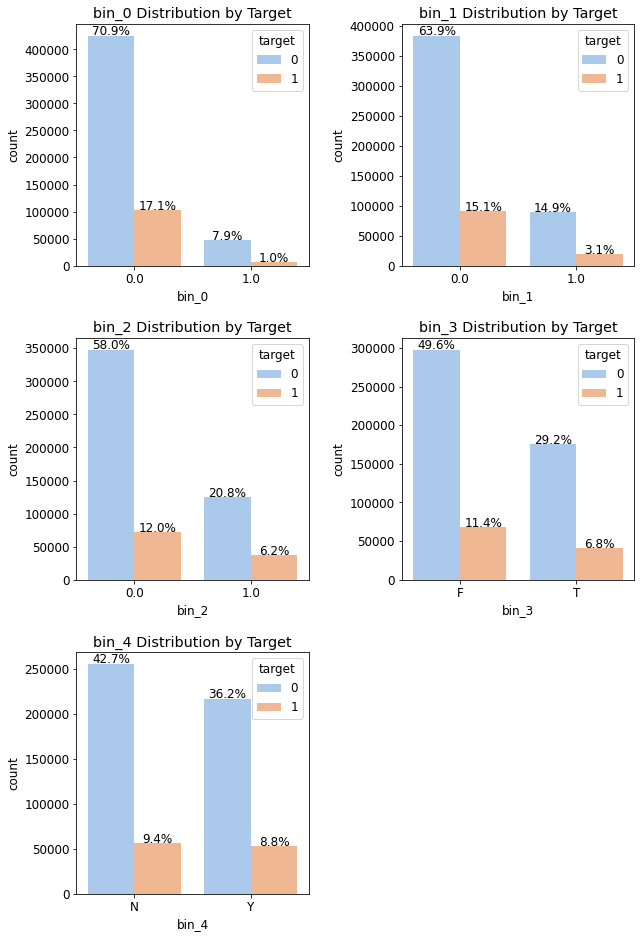

In [15]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치

# 3행 2열 틀(Figure) 준비
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] # 피처 목록

for idx, feature in enumerate(bin_features): 
    ax = plt.subplot(grid[idx]) 
    
    # ax축에 타깃값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=train,
                  hue='target',
                  palette='pastel', # 그래프 색상 설정
                  ax=ax)
    
    ax.set_title(f'{feature} Distribution by Target') # 그래프 제목 설정
    write_percent(ax, len(train))                     # 비율 표시

### 명목형 피처 분포

#### 스텝 1 : 교차분석표 생성 함수 만들기

In [16]:
pd.crosstab(train['nom_0'], train['target'])

target,0,1
nom_0,,
Blue,165561,40300
Green,43143,9458
Red,264103,59183


In [17]:
# 정규화 후 비율을 백분율로 표현
crosstab = pd.crosstab(train['nom_0'], train['target'], normalize='index')*100
crosstab

target,0,1
nom_0,,
Blue,80.423684,19.576316
Green,82.019353,17.980647
Red,81.693299,18.306701


In [18]:
crosstab = crosstab.reset_index() # 인덱스 재설정
crosstab

target,nom_0,0,1
0,Blue,80.423684,19.576316
1,Green,82.019353,17.980647
2,Red,81.693299,18.306701


In [19]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

In [20]:
crosstab = get_crosstab(train, 'nom_0')
crosstab

target,nom_0,0,1
0,Blue,80.423684,19.576316
1,Green,82.019353,17.980647
2,Red,81.693299,18.306701


In [21]:
crosstab[1]

0    19.576316
1    17.980647
2    18.306701
Name: 1, dtype: float64

#### 스텝 2 : 포인트플롯 생성 함수 만들기

In [22]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values, # 포인트플롯 순서
                        color='black',                  # 포인트플롯 색상
                        legend=False)                   # 범례 미표시
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

#### 스텝 3 : 피처 분포도 및 피처별 타깃값 1의 비율 포인트플롯 생성 함수 만들기

In [23]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, 
                                  size=(15, 20)):
    plt.figure(figsize=size)  # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # 서브플롯 좌우/상하 여백 설정
    
    for idx, feature in enumerate(features): 
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성

        # ax축에 타깃값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)

        write_percent(ax, len(df)) # 비율 표시
       
        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기
        
        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정

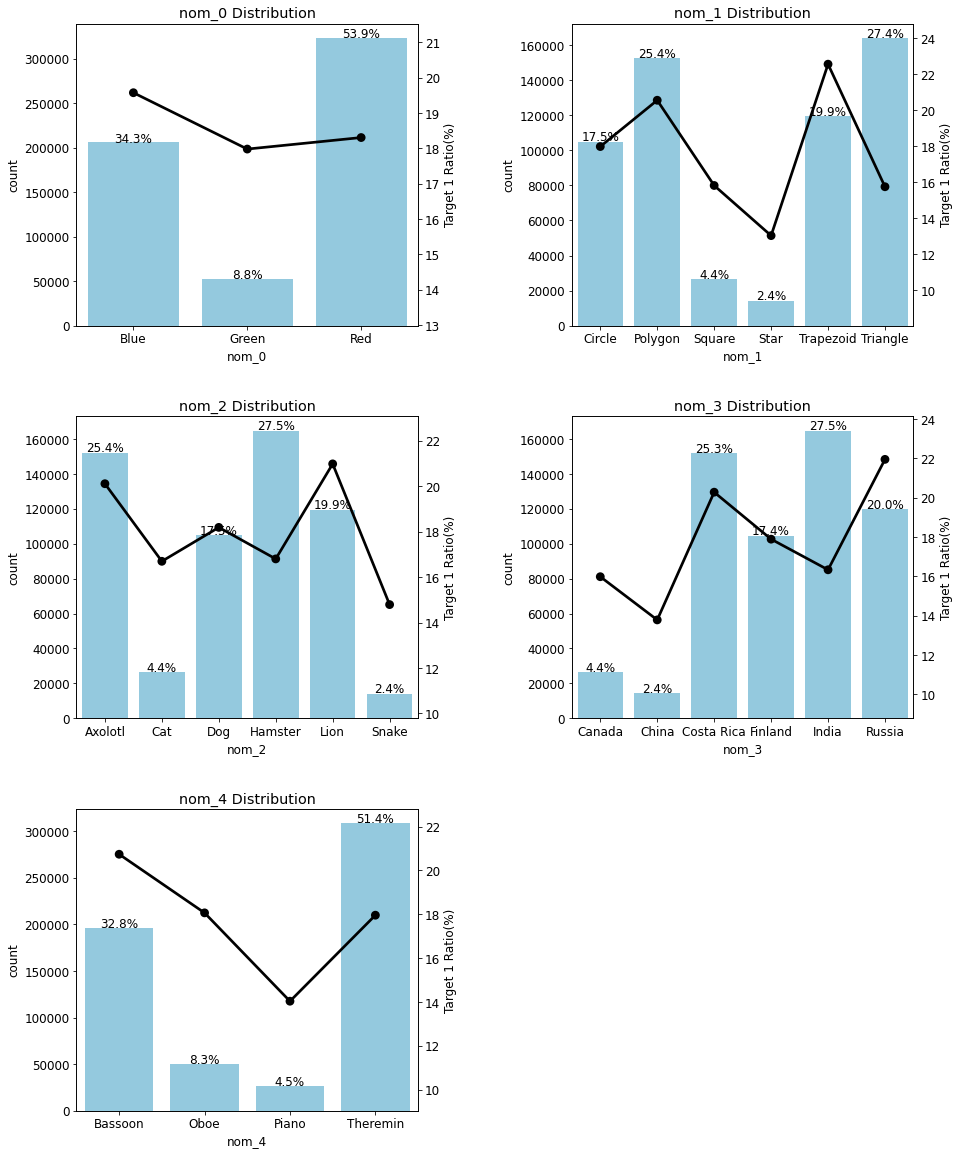

In [24]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'] # 명목형 피처
plot_cat_dist_with_true_ratio(train, nom_features, num_rows=3, num_cols=2)

### 순서형 피처 분포

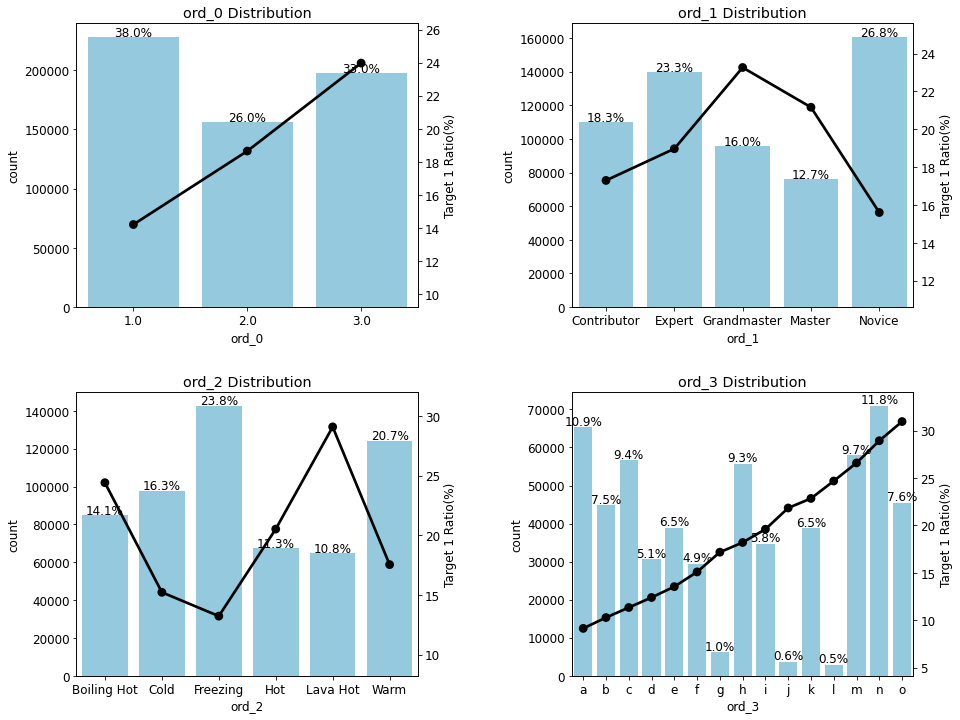

In [25]:
ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3'] # 순서형 피처
plot_cat_dist_with_true_ratio(train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))

In [26]:
from pandas.api.types import CategoricalDtype 

ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

# 순서를 지정한 범주형 데이터 타입
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

# 데이터 타입 변경
train['ord_1'] = train['ord_1'].astype(ord_1_dtype)
train['ord_2'] = train['ord_2'].astype(ord_2_dtype)

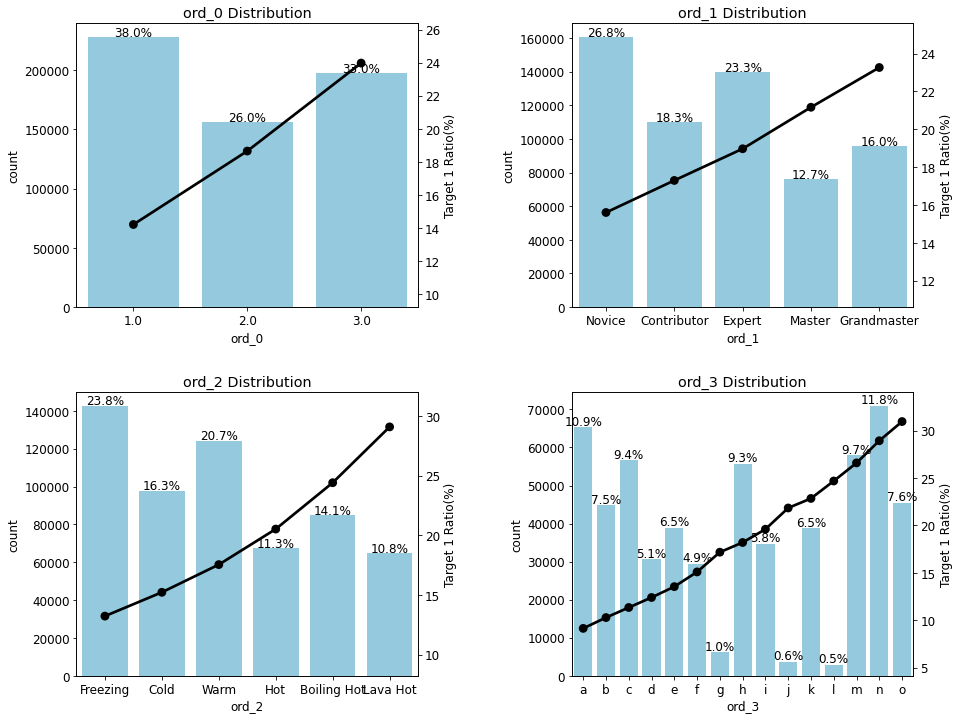

In [27]:
plot_cat_dist_with_true_ratio(train, ord_features, 
                              num_rows=2, num_cols=2, size=(15, 12))

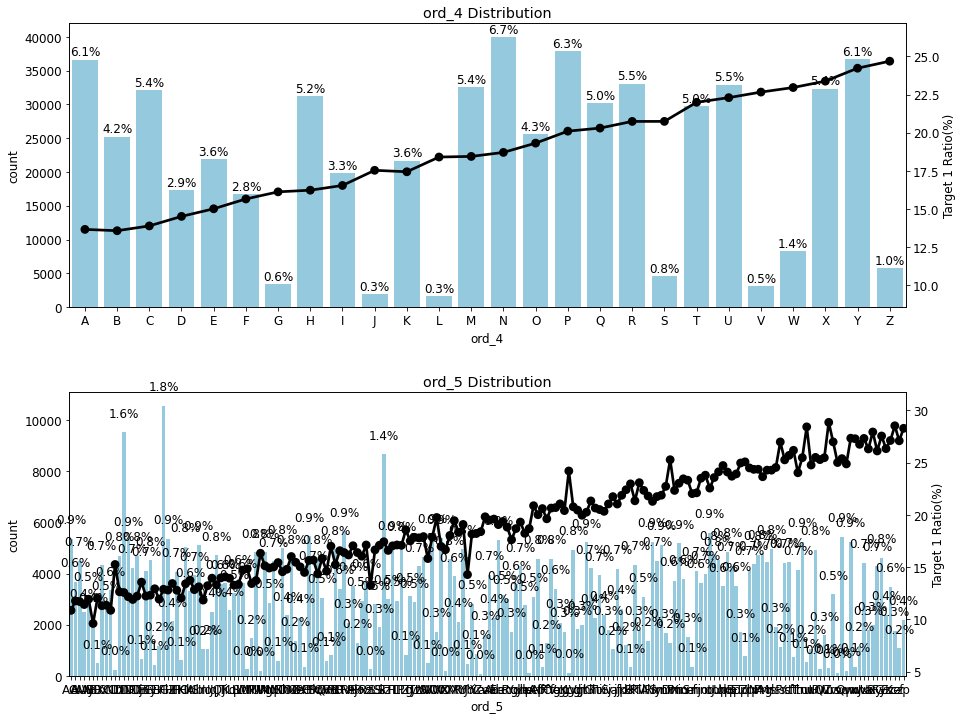

In [28]:
plot_cat_dist_with_true_ratio(train, ['ord_4', 'ord_5'], 
                              num_rows=2, num_cols=1, size=(15, 12))

### 날짜 피처 분포

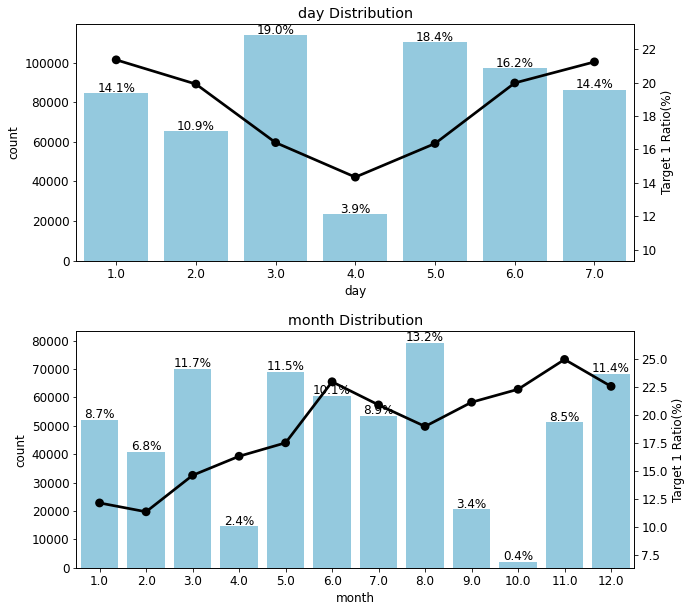

In [29]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train, date_features, 
                              num_rows=2, num_cols=1, size=(10, 10))